In [1]:
import torch
import torch.nn as nn
from temporal_encoder import Temporal_Encoder
from spacial_encoder import Spacial_Encoder
from unet_decoder import Unet_Decoder
from data_loader import data_loader
from torch.utils.data import DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt
import os
import pickle
from CNN import plot_losses
from temporal_spacial_encoder_decoder import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

%load_ext autoreload
%autoreload 2

Using device: cuda


In [2]:
!nvidia-smi -L

GPU 0: NVIDIA H200 (UUID: GPU-9746ad3e-3187-e01a-a32c-475af15ac00d)


In [3]:
# Set paths
folder_path = "/mnt/dataset"
feature_path = os.path.join(folder_path, "feature")  # Replace with your actual path
label_path = os.path.join(folder_path, "label")      # Replace with your actual path

# Load data
dl = data_loader(feature_path, label_path)
dl.check()
train_set, valid_set = torch.utils.data.random_split(dl, [int(len(dl)*0.8), len(dl) - int(len(dl)*0.8)])
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_set, batch_size=32, shuffle=False)

## Default config

In [4]:
temp_config = dict()
spacial_config = dict(in_channels=5, base_features=64, num_layers=4, use_skip=True)
decoder_config = dict(out_channels=1, base_features=64, num_layers=4)

## Load config from file

In [4]:
with open("scratch/TSED_0725/best_hyperparams.pkl", "rb") as fin:
    temp_config, spacial_config, decoder_config = pickle.load(fin)

In [5]:
print(temp_config)
print(spacial_config)
print(decoder_config)

{'embed_dim': 2048, 'num_heads': 2, 'num_layers': 6, 'mlp_ratio': 6.379023180364556}
{'base_features': 32, 'num_layers': 4}
{'out_channels': 1, 'num_layers': 4, 'bottleneck_channels': 512, 'use_skip': True}


## Load the study

In [6]:
import optuna
output_dir = "scratch/TSED_0725"
prefix = "TSED_0725"
study = optuna.create_study(
    direction="minimize",
    study_name=prefix,
    storage=f"sqlite:///{output_dir}/study.db",
    load_if_exists=True
)

[I 2025-07-26 11:06:53,608] Using an existing study with name 'TSED_0725' instead of creating a new one.


In [7]:
print(study.best_trial)

FrozenTrial(number=25, state=1, values=[0.005677913143657721], datetime_start=datetime.datetime(2025, 7, 26, 1, 49, 11, 588656), datetime_complete=datetime.datetime(2025, 7, 26, 2, 6, 3, 566868), params={'base_features': 32, 'temporal_encoder.embed_dim': 2048, 'temporal_encoder.num_heads': 2, 'temporal_encoder.num_layers': 6, 'temporal_encoder.mlp_ratio': 6.379023180364556, 'spacial_encoder.num_layers': 4}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'base_features': CategoricalDistribution(choices=(32, 64, 128, 256)), 'temporal_encoder.embed_dim': CategoricalDistribution(choices=(128, 256, 512, 1024, 2048)), 'temporal_encoder.num_heads': CategoricalDistribution(choices=(2, 4, 8, 16, 32, 64)), 'temporal_encoder.num_layers': IntDistribution(high=6, log=False, low=2, step=1), 'temporal_encoder.mlp_ratio': FloatDistribution(high=7.0, log=False, low=1.0, step=None), 'spacial_encoder.num_layers': IntDistribution(high=4, log=False, low=1, step=1)}, trial_id=26, val

## Train the model

In [8]:
model = FullModel(temp_config=temp_config, 
                  spacial_config=spacial_config,
                  decoder_config=decoder_config)
model.to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

100%|██████████| 257/257 [01:33<00:00,  2.74it/s]


[ Train | 001/100 ] loss = 0.021179


100%|██████████| 65/65 [00:18<00:00,  3.60it/s]


[ Valid | 001/100 ] loss = 0.013695
[ Valid | 001/100 ] loss = 0.013695 -> best
Best model found at epoch 0, saving model


100%|██████████| 257/257 [01:46<00:00,  2.42it/s]


[ Train | 002/100 ] loss = 0.010627


100%|██████████| 65/65 [01:04<00:00,  1.01it/s]


[ Valid | 002/100 ] loss = 0.012755
[ Valid | 002/100 ] loss = 0.012755 -> best
Best model found at epoch 1, saving model


100%|██████████| 257/257 [01:25<00:00,  3.00it/s]


[ Train | 003/100 ] loss = 0.0085964


100%|██████████| 65/65 [00:31<00:00,  2.06it/s]


[ Valid | 003/100 ] loss = 0.0082935
[ Valid | 003/100 ] loss = 0.0082935 -> best
Best model found at epoch 2, saving model


100%|██████████| 257/257 [01:34<00:00,  2.73it/s]


[ Train | 004/100 ] loss = 0.0075427


100%|██████████| 65/65 [00:25<00:00,  2.55it/s]


[ Valid | 004/100 ] loss = 0.007232
[ Valid | 004/100 ] loss = 0.007232 -> best
Best model found at epoch 3, saving model


100%|██████████| 257/257 [01:50<00:00,  2.33it/s]


[ Train | 005/100 ] loss = 0.0069366


100%|██████████| 65/65 [01:05<00:00,  1.01s/it]


[ Valid | 005/100 ] loss = 0.028522
[ Valid | 005/100 ] loss = 0.028522


100%|██████████| 257/257 [02:14<00:00,  1.92it/s]


[ Train | 006/100 ] loss = 0.0063857


100%|██████████| 65/65 [00:40<00:00,  1.59it/s]


[ Valid | 006/100 ] loss = 0.0074281
[ Valid | 006/100 ] loss = 0.0074281


100%|██████████| 257/257 [01:13<00:00,  3.48it/s]


[ Train | 007/100 ] loss = 0.0060847


100%|██████████| 65/65 [00:14<00:00,  4.55it/s]


[ Valid | 007/100 ] loss = 0.0060952
[ Valid | 007/100 ] loss = 0.0060952 -> best
Best model found at epoch 6, saving model


100%|██████████| 257/257 [02:10<00:00,  1.97it/s]


[ Train | 008/100 ] loss = 0.0057098


100%|██████████| 65/65 [00:48<00:00,  1.35it/s]


[ Valid | 008/100 ] loss = 0.006039
[ Valid | 008/100 ] loss = 0.006039 -> best
Best model found at epoch 7, saving model


100%|██████████| 257/257 [01:39<00:00,  2.57it/s]


[ Train | 009/100 ] loss = 0.0053858


100%|██████████| 65/65 [00:12<00:00,  5.04it/s]


[ Valid | 009/100 ] loss = 0.0055134
[ Valid | 009/100 ] loss = 0.0055134 -> best
Best model found at epoch 8, saving model


100%|██████████| 257/257 [01:37<00:00,  2.63it/s]


[ Train | 010/100 ] loss = 0.005153


100%|██████████| 65/65 [00:14<00:00,  4.35it/s]


[ Valid | 010/100 ] loss = 0.0053156
[ Valid | 010/100 ] loss = 0.0053156 -> best
Best model found at epoch 9, saving model


100%|██████████| 257/257 [02:47<00:00,  1.53it/s]


[ Train | 011/100 ] loss = 0.0049456


100%|██████████| 65/65 [02:27<00:00,  2.28s/it]


[ Valid | 011/100 ] loss = 0.0059176
[ Valid | 011/100 ] loss = 0.0059176


100%|██████████| 257/257 [10:25<00:00,  2.43s/it]


[ Train | 012/100 ] loss = 0.0049216


100%|██████████| 65/65 [00:12<00:00,  5.13it/s]


[ Valid | 012/100 ] loss = 0.015669
[ Valid | 012/100 ] loss = 0.015669


100%|██████████| 257/257 [01:13<00:00,  3.49it/s]


[ Train | 013/100 ] loss = 0.0049092


100%|██████████| 65/65 [00:13<00:00,  4.96it/s]


[ Valid | 013/100 ] loss = 0.0055039
[ Valid | 013/100 ] loss = 0.0055039


100%|██████████| 257/257 [01:14<00:00,  3.44it/s]


[ Train | 014/100 ] loss = 0.004568


100%|██████████| 65/65 [00:12<00:00,  5.01it/s]


[ Valid | 014/100 ] loss = 0.0049377
[ Valid | 014/100 ] loss = 0.0049377 -> best
Best model found at epoch 13, saving model


100%|██████████| 257/257 [03:50<00:00,  1.11it/s]


[ Train | 015/100 ] loss = 0.0043009


100%|██████████| 65/65 [00:13<00:00,  4.85it/s]


[ Valid | 015/100 ] loss = 0.0048735
[ Valid | 015/100 ] loss = 0.0048735 -> best
Best model found at epoch 14, saving model


100%|██████████| 257/257 [01:54<00:00,  2.25it/s]


[ Train | 016/100 ] loss = 0.0041673


100%|██████████| 65/65 [00:12<00:00,  5.13it/s]


[ Valid | 016/100 ] loss = 0.0050973
[ Valid | 016/100 ] loss = 0.0050973


100%|██████████| 257/257 [02:02<00:00,  2.10it/s]


[ Train | 017/100 ] loss = 0.0040656


100%|██████████| 65/65 [00:32<00:00,  1.98it/s]


[ Valid | 017/100 ] loss = 0.0048258
[ Valid | 017/100 ] loss = 0.0048258 -> best
Best model found at epoch 16, saving model


100%|██████████| 257/257 [01:36<00:00,  2.65it/s]


[ Train | 018/100 ] loss = 0.0039489


100%|██████████| 65/65 [00:18<00:00,  3.61it/s]


[ Valid | 018/100 ] loss = 0.0047628
[ Valid | 018/100 ] loss = 0.0047628 -> best
Best model found at epoch 17, saving model


100%|██████████| 257/257 [01:40<00:00,  2.55it/s]


[ Train | 019/100 ] loss = 0.0038922


100%|██████████| 65/65 [00:13<00:00,  4.98it/s]


[ Valid | 019/100 ] loss = 0.0046093
[ Valid | 019/100 ] loss = 0.0046093 -> best
Best model found at epoch 18, saving model


100%|██████████| 257/257 [01:59<00:00,  2.15it/s]


[ Train | 020/100 ] loss = 0.0037985


100%|██████████| 65/65 [00:59<00:00,  1.10it/s]


[ Valid | 020/100 ] loss = 0.0049353
[ Valid | 020/100 ] loss = 0.0049353


100%|██████████| 257/257 [02:03<00:00,  2.08it/s]


[ Train | 021/100 ] loss = 0.0036602


100%|██████████| 65/65 [00:36<00:00,  1.79it/s]


[ Valid | 021/100 ] loss = 0.0056314
[ Valid | 021/100 ] loss = 0.0056314


100%|██████████| 257/257 [01:14<00:00,  3.47it/s]


[ Train | 022/100 ] loss = 0.0035841


100%|██████████| 65/65 [00:12<00:00,  5.01it/s]


[ Valid | 022/100 ] loss = 0.0055583
[ Valid | 022/100 ] loss = 0.0055583


100%|██████████| 257/257 [01:14<00:00,  3.43it/s]


[ Train | 023/100 ] loss = 0.003529


100%|██████████| 65/65 [00:13<00:00,  4.97it/s]


[ Valid | 023/100 ] loss = 0.011716
[ Valid | 023/100 ] loss = 0.011716


100%|██████████| 257/257 [01:13<00:00,  3.49it/s]


[ Train | 024/100 ] loss = 0.0036276


100%|██████████| 65/65 [00:12<00:00,  5.08it/s]


[ Valid | 024/100 ] loss = 0.0049294
[ Valid | 024/100 ] loss = 0.0049294


100%|██████████| 257/257 [01:14<00:00,  3.47it/s]


[ Train | 025/100 ] loss = 0.0034992


100%|██████████| 65/65 [00:12<00:00,  5.03it/s]


[ Valid | 025/100 ] loss = 0.0043719
[ Valid | 025/100 ] loss = 0.0043719 -> best
Best model found at epoch 24, saving model


100%|██████████| 257/257 [05:35<00:00,  1.30s/it]


[ Train | 026/100 ] loss = 0.0032279


100%|██████████| 65/65 [00:58<00:00,  1.11it/s]


[ Valid | 026/100 ] loss = 0.0042831
[ Valid | 026/100 ] loss = 0.0042831 -> best
Best model found at epoch 25, saving model


100%|██████████| 257/257 [01:48<00:00,  2.36it/s]


[ Train | 027/100 ] loss = 0.0031215


100%|██████████| 65/65 [00:21<00:00,  2.98it/s]


[ Valid | 027/100 ] loss = 0.004358
[ Valid | 027/100 ] loss = 0.004358


100%|██████████| 257/257 [01:58<00:00,  2.18it/s]


[ Train | 028/100 ] loss = 0.0030421


100%|██████████| 65/65 [01:44<00:00,  1.61s/it]


[ Valid | 028/100 ] loss = 0.0043791
[ Valid | 028/100 ] loss = 0.0043791


100%|██████████| 257/257 [01:50<00:00,  2.34it/s]


[ Train | 029/100 ] loss = 0.0029712


100%|██████████| 65/65 [00:52<00:00,  1.25it/s]


[ Valid | 029/100 ] loss = 0.0045378
[ Valid | 029/100 ] loss = 0.0045378


100%|██████████| 257/257 [01:14<00:00,  3.43it/s]


[ Train | 030/100 ] loss = 0.0029695


100%|██████████| 65/65 [00:13<00:00,  5.00it/s]


[ Valid | 030/100 ] loss = 0.0043584
[ Valid | 030/100 ] loss = 0.0043584


100%|██████████| 257/257 [01:14<00:00,  3.44it/s]


[ Train | 031/100 ] loss = 0.002827


100%|██████████| 65/65 [00:12<00:00,  5.08it/s]


[ Valid | 031/100 ] loss = 0.004378
[ Valid | 031/100 ] loss = 0.004378


100%|██████████| 257/257 [01:14<00:00,  3.46it/s]


[ Train | 032/100 ] loss = 0.0027986


100%|██████████| 65/65 [00:12<00:00,  5.03it/s]


[ Valid | 032/100 ] loss = 0.0043058
[ Valid | 032/100 ] loss = 0.0043058


100%|██████████| 257/257 [01:14<00:00,  3.47it/s]


[ Train | 033/100 ] loss = 0.0028064


100%|██████████| 65/65 [00:12<00:00,  5.06it/s]


[ Valid | 033/100 ] loss = 0.0042254
[ Valid | 033/100 ] loss = 0.0042254 -> best
Best model found at epoch 32, saving model


100%|██████████| 257/257 [05:47<00:00,  1.35s/it]


[ Train | 034/100 ] loss = 0.0027761


100%|██████████| 65/65 [02:30<00:00,  2.32s/it]


[ Valid | 034/100 ] loss = 0.0046401
[ Valid | 034/100 ] loss = 0.0046401


100%|██████████| 257/257 [01:17<00:00,  3.32it/s]


[ Train | 035/100 ] loss = 0.0029571


100%|██████████| 65/65 [01:36<00:00,  1.48s/it]


[ Valid | 035/100 ] loss = 0.0043092
[ Valid | 035/100 ] loss = 0.0043092


100%|██████████| 257/257 [02:14<00:00,  1.92it/s]


[ Train | 036/100 ] loss = 0.0027398


100%|██████████| 65/65 [00:13<00:00,  4.88it/s]


[ Valid | 036/100 ] loss = 0.0050095
[ Valid | 036/100 ] loss = 0.0050095


100%|██████████| 257/257 [01:15<00:00,  3.40it/s]


[ Train | 037/100 ] loss = 0.0033648


100%|██████████| 65/65 [00:12<00:00,  5.10it/s]


[ Valid | 037/100 ] loss = 0.0043361
[ Valid | 037/100 ] loss = 0.0043361


100%|██████████| 257/257 [01:15<00:00,  3.41it/s]


[ Train | 038/100 ] loss = 0.0026549


100%|██████████| 65/65 [00:12<00:00,  5.04it/s]


[ Valid | 038/100 ] loss = 0.0041146
[ Valid | 038/100 ] loss = 0.0041146 -> best
Best model found at epoch 37, saving model


100%|██████████| 257/257 [01:34<00:00,  2.73it/s]


[ Train | 039/100 ] loss = 0.0026215


100%|██████████| 65/65 [00:13<00:00,  4.91it/s]


[ Valid | 039/100 ] loss = 0.0051704
[ Valid | 039/100 ] loss = 0.0051704


100%|██████████| 257/257 [01:35<00:00,  2.70it/s]


[ Train | 040/100 ] loss = 0.0025397


100%|██████████| 65/65 [00:33<00:00,  1.95it/s]


[ Valid | 040/100 ] loss = 0.0040436
[ Valid | 040/100 ] loss = 0.0040436 -> best
Best model found at epoch 39, saving model


100%|██████████| 257/257 [01:22<00:00,  3.12it/s]


[ Train | 041/100 ] loss = 0.0024943


100%|██████████| 65/65 [00:56<00:00,  1.16it/s]


[ Valid | 041/100 ] loss = 0.0041865
[ Valid | 041/100 ] loss = 0.0041865


100%|██████████| 257/257 [08:35<00:00,  2.01s/it]


[ Train | 042/100 ] loss = 0.0024523


100%|██████████| 65/65 [00:15<00:00,  4.24it/s]


[ Valid | 042/100 ] loss = 0.004178
[ Valid | 042/100 ] loss = 0.004178


100%|██████████| 257/257 [01:13<00:00,  3.49it/s]


[ Train | 043/100 ] loss = 0.002411


100%|██████████| 65/65 [00:12<00:00,  5.04it/s]


[ Valid | 043/100 ] loss = 0.0039427
[ Valid | 043/100 ] loss = 0.0039427 -> best
Best model found at epoch 42, saving model


100%|██████████| 257/257 [02:04<00:00,  2.07it/s]


[ Train | 044/100 ] loss = 0.0023055


100%|██████████| 65/65 [01:36<00:00,  1.48s/it]


[ Valid | 044/100 ] loss = 0.0039746
[ Valid | 044/100 ] loss = 0.0039746


100%|██████████| 257/257 [05:07<00:00,  1.20s/it]


[ Train | 045/100 ] loss = 0.0023481


100%|██████████| 65/65 [01:13<00:00,  1.13s/it]


[ Valid | 045/100 ] loss = 0.0047579
[ Valid | 045/100 ] loss = 0.0047579


100%|██████████| 257/257 [01:14<00:00,  3.45it/s]


[ Train | 046/100 ] loss = 0.0023044


100%|██████████| 65/65 [00:12<00:00,  5.03it/s]


[ Valid | 046/100 ] loss = 0.0040786
[ Valid | 046/100 ] loss = 0.0040786


100%|██████████| 257/257 [01:14<00:00,  3.43it/s]


[ Train | 047/100 ] loss = 0.0023205


100%|██████████| 65/65 [00:13<00:00,  4.90it/s]


[ Valid | 047/100 ] loss = 0.0042284
[ Valid | 047/100 ] loss = 0.0042284


100%|██████████| 257/257 [01:14<00:00,  3.46it/s]


[ Train | 048/100 ] loss = 0.0022006


100%|██████████| 65/65 [00:12<00:00,  5.11it/s]


[ Valid | 048/100 ] loss = 0.012371
[ Valid | 048/100 ] loss = 0.012371


100%|██████████| 257/257 [01:14<00:00,  3.45it/s]


[ Train | 049/100 ] loss = 0.0032838


100%|██████████| 65/65 [00:12<00:00,  5.04it/s]


[ Valid | 049/100 ] loss = 0.0043588
[ Valid | 049/100 ] loss = 0.0043588


100%|██████████| 257/257 [01:14<00:00,  3.46it/s]


[ Train | 050/100 ] loss = 0.0024739


100%|██████████| 65/65 [00:12<00:00,  5.03it/s]


[ Valid | 050/100 ] loss = 0.0040192
[ Valid | 050/100 ] loss = 0.0040192


100%|██████████| 257/257 [01:13<00:00,  3.47it/s]


[ Train | 051/100 ] loss = 0.0023002


100%|██████████| 65/65 [00:12<00:00,  5.11it/s]


[ Valid | 051/100 ] loss = 0.0042188
[ Valid | 051/100 ] loss = 0.0042188


100%|██████████| 257/257 [01:13<00:00,  3.49it/s]


[ Train | 052/100 ] loss = 0.0021657


100%|██████████| 65/65 [00:12<00:00,  5.01it/s]


[ Valid | 052/100 ] loss = 0.0039766
[ Valid | 052/100 ] loss = 0.0039766


100%|██████████| 257/257 [01:14<00:00,  3.47it/s]


[ Train | 053/100 ] loss = 0.0021335


100%|██████████| 65/65 [00:12<00:00,  5.08it/s]


[ Valid | 053/100 ] loss = 0.004524
[ Valid | 053/100 ] loss = 0.004524


100%|██████████| 257/257 [01:14<00:00,  3.47it/s]


[ Train | 054/100 ] loss = 0.0021682


100%|██████████| 65/65 [00:12<00:00,  5.05it/s]


[ Valid | 054/100 ] loss = 0.0039208
[ Valid | 054/100 ] loss = 0.0039208 -> best
Best model found at epoch 53, saving model


100%|██████████| 257/257 [04:34<00:00,  1.07s/it]


[ Train | 055/100 ] loss = 0.0020803


100%|██████████| 65/65 [01:10<00:00,  1.09s/it]


[ Valid | 055/100 ] loss = 0.0038937
[ Valid | 055/100 ] loss = 0.0038937 -> best
Best model found at epoch 54, saving model


100%|██████████| 257/257 [02:42<00:00,  1.58it/s]


[ Train | 056/100 ] loss = 0.0020372


100%|██████████| 65/65 [01:17<00:00,  1.20s/it]


[ Valid | 056/100 ] loss = 0.0042992
[ Valid | 056/100 ] loss = 0.0042992


100%|██████████| 257/257 [01:48<00:00,  2.36it/s]


[ Train | 057/100 ] loss = 0.0020945


100%|██████████| 65/65 [00:12<00:00,  5.01it/s]


[ Valid | 057/100 ] loss = 0.0050844
[ Valid | 057/100 ] loss = 0.0050844


100%|██████████| 257/257 [01:50<00:00,  2.32it/s]


[ Train | 058/100 ] loss = 0.002068


100%|██████████| 65/65 [00:12<00:00,  5.13it/s]


[ Valid | 058/100 ] loss = 0.0038484
[ Valid | 058/100 ] loss = 0.0038484 -> best
Best model found at epoch 57, saving model


100%|██████████| 257/257 [01:54<00:00,  2.24it/s]


[ Train | 059/100 ] loss = 0.0020005


100%|██████████| 65/65 [00:13<00:00,  4.93it/s]


[ Valid | 059/100 ] loss = 0.00394
[ Valid | 059/100 ] loss = 0.00394


100%|██████████| 257/257 [01:29<00:00,  2.86it/s]


[ Train | 060/100 ] loss = 0.0020264


100%|██████████| 65/65 [00:12<00:00,  5.08it/s]


[ Valid | 060/100 ] loss = 0.0095266
[ Valid | 060/100 ] loss = 0.0095266


100%|██████████| 257/257 [01:14<00:00,  3.44it/s]


[ Train | 061/100 ] loss = 0.0022036


100%|██████████| 65/65 [00:12<00:00,  5.03it/s]


[ Valid | 061/100 ] loss = 0.0042432
[ Valid | 061/100 ] loss = 0.0042432


100%|██████████| 257/257 [01:14<00:00,  3.47it/s]


[ Train | 062/100 ] loss = 0.0020006


100%|██████████| 65/65 [00:12<00:00,  5.16it/s]


[ Valid | 062/100 ] loss = 0.0040728
[ Valid | 062/100 ] loss = 0.0040728


100%|██████████| 257/257 [01:13<00:00,  3.49it/s]


[ Train | 063/100 ] loss = 0.0019453


100%|██████████| 65/65 [00:12<00:00,  5.13it/s]


[ Valid | 063/100 ] loss = 0.005988
[ Valid | 063/100 ] loss = 0.005988


100%|██████████| 257/257 [01:13<00:00,  3.47it/s]


[ Train | 064/100 ] loss = 0.0033629


100%|██████████| 65/65 [00:12<00:00,  5.10it/s]


[ Valid | 064/100 ] loss = 0.004008
[ Valid | 064/100 ] loss = 0.004008


100%|██████████| 257/257 [01:13<00:00,  3.48it/s]


[ Train | 065/100 ] loss = 0.0022309


100%|██████████| 65/65 [00:12<00:00,  5.15it/s]


[ Valid | 065/100 ] loss = 0.0041003
[ Valid | 065/100 ] loss = 0.0041003


100%|██████████| 257/257 [01:14<00:00,  3.46it/s]


[ Train | 066/100 ] loss = 0.0019896


100%|██████████| 65/65 [00:12<00:00,  5.05it/s]


[ Valid | 066/100 ] loss = 0.003819
[ Valid | 066/100 ] loss = 0.003819 -> best
Best model found at epoch 65, saving model


100%|██████████| 257/257 [08:46<00:00,  2.05s/it]


[ Train | 067/100 ] loss = 0.0019095


100%|██████████| 65/65 [01:44<00:00,  1.61s/it]


[ Valid | 067/100 ] loss = 0.014249
[ Valid | 067/100 ] loss = 0.014249


100%|██████████| 257/257 [01:53<00:00,  2.27it/s]


[ Train | 068/100 ] loss = 0.0024099


100%|██████████| 65/65 [00:12<00:00,  5.12it/s]


[ Valid | 068/100 ] loss = 0.004105
[ Valid | 068/100 ] loss = 0.004105


100%|██████████| 257/257 [01:59<00:00,  2.15it/s]


[ Train | 069/100 ] loss = 0.0019334


100%|██████████| 65/65 [01:27<00:00,  1.34s/it]


[ Valid | 069/100 ] loss = 0.0039967
[ Valid | 069/100 ] loss = 0.0039967


100%|██████████| 257/257 [01:14<00:00,  3.43it/s]


[ Train | 070/100 ] loss = 0.0018857


100%|██████████| 65/65 [00:12<00:00,  5.09it/s]


[ Valid | 070/100 ] loss = 0.0040844
[ Valid | 070/100 ] loss = 0.0040844


100%|██████████| 257/257 [01:14<00:00,  3.45it/s]


[ Train | 071/100 ] loss = 0.0018392


100%|██████████| 65/65 [00:12<00:00,  5.10it/s]


[ Valid | 071/100 ] loss = 0.0050731
[ Valid | 071/100 ] loss = 0.0050731


100%|██████████| 257/257 [01:14<00:00,  3.46it/s]


[ Train | 072/100 ] loss = 0.0019561


100%|██████████| 65/65 [00:12<00:00,  5.12it/s]


[ Valid | 072/100 ] loss = 0.0041785
[ Valid | 072/100 ] loss = 0.0041785


100%|██████████| 257/257 [01:55<00:00,  2.23it/s]


[ Train | 073/100 ] loss = 0.0018672


100%|██████████| 65/65 [00:18<00:00,  3.52it/s]


[ Valid | 073/100 ] loss = 0.0039734
[ Valid | 073/100 ] loss = 0.0039734


100%|██████████| 257/257 [01:16<00:00,  3.35it/s]


[ Train | 074/100 ] loss = 0.0018196


100%|██████████| 65/65 [00:12<00:00,  5.12it/s]


[ Valid | 074/100 ] loss = 0.0037928
[ Valid | 074/100 ] loss = 0.0037928 -> best
Best model found at epoch 73, saving model


100%|██████████| 257/257 [02:52<00:00,  1.49it/s]


[ Train | 075/100 ] loss = 0.0017537


100%|██████████| 65/65 [01:26<00:00,  1.33s/it]


[ Valid | 075/100 ] loss = 0.0040216
[ Valid | 075/100 ] loss = 0.0040216


100%|██████████| 257/257 [01:41<00:00,  2.53it/s]


[ Train | 076/100 ] loss = 0.0017899


100%|██████████| 65/65 [00:12<00:00,  5.12it/s]


[ Valid | 076/100 ] loss = 0.0039455
[ Valid | 076/100 ] loss = 0.0039455


100%|██████████| 257/257 [01:29<00:00,  2.88it/s]


[ Train | 077/100 ] loss = 0.0017354


100%|██████████| 65/65 [00:28<00:00,  2.30it/s]


[ Valid | 077/100 ] loss = 0.0038884
[ Valid | 077/100 ] loss = 0.0038884


100%|██████████| 257/257 [01:15<00:00,  3.38it/s]


[ Train | 078/100 ] loss = 0.0017142


100%|██████████| 65/65 [00:13<00:00,  4.96it/s]


[ Valid | 078/100 ] loss = 0.0040203
[ Valid | 078/100 ] loss = 0.0040203


100%|██████████| 257/257 [01:13<00:00,  3.49it/s]


[ Train | 079/100 ] loss = 0.0017692


100%|██████████| 65/65 [00:12<00:00,  5.01it/s]


[ Valid | 079/100 ] loss = 0.0040783
[ Valid | 079/100 ] loss = 0.0040783


100%|██████████| 257/257 [01:15<00:00,  3.42it/s]


[ Train | 080/100 ] loss = 0.0017934


100%|██████████| 65/65 [00:12<00:00,  5.03it/s]


[ Valid | 080/100 ] loss = 0.003814
[ Valid | 080/100 ] loss = 0.003814


100%|██████████| 257/257 [01:14<00:00,  3.46it/s]


[ Train | 081/100 ] loss = 0.0017055


100%|██████████| 65/65 [00:12<00:00,  5.09it/s]


[ Valid | 081/100 ] loss = 0.0045552
[ Valid | 081/100 ] loss = 0.0045552


100%|██████████| 257/257 [01:14<00:00,  3.44it/s]


[ Train | 082/100 ] loss = 0.001794


100%|██████████| 65/65 [00:12<00:00,  5.05it/s]


[ Valid | 082/100 ] loss = 0.0043355
[ Valid | 082/100 ] loss = 0.0043355


100%|██████████| 257/257 [01:14<00:00,  3.45it/s]


[ Train | 083/100 ] loss = 0.0017845


100%|██████████| 65/65 [00:12<00:00,  5.05it/s]


[ Valid | 083/100 ] loss = 0.0039118
[ Valid | 083/100 ] loss = 0.0039118


100%|██████████| 257/257 [01:21<00:00,  3.17it/s]


[ Train | 084/100 ] loss = 0.0016865


100%|██████████| 65/65 [00:12<00:00,  5.03it/s]


[ Valid | 084/100 ] loss = 0.0041301
[ Valid | 084/100 ] loss = 0.0041301


100%|██████████| 257/257 [01:28<00:00,  2.90it/s]


[ Train | 085/100 ] loss = 0.0017146


100%|██████████| 65/65 [00:12<00:00,  5.07it/s]


[ Valid | 085/100 ] loss = 0.0041103
[ Valid | 085/100 ] loss = 0.0041103


100%|██████████| 257/257 [01:14<00:00,  3.45it/s]


[ Train | 086/100 ] loss = 0.0017135


100%|██████████| 65/65 [00:12<00:00,  5.14it/s]


[ Valid | 086/100 ] loss = 0.0038155
[ Valid | 086/100 ] loss = 0.0038155


100%|██████████| 257/257 [01:13<00:00,  3.48it/s]


[ Train | 087/100 ] loss = 0.0016241


100%|██████████| 65/65 [00:12<00:00,  5.09it/s]


[ Valid | 087/100 ] loss = 0.0041434
[ Valid | 087/100 ] loss = 0.0041434


100%|██████████| 257/257 [01:14<00:00,  3.45it/s]


[ Train | 088/100 ] loss = 0.0016848


100%|██████████| 65/65 [00:12<00:00,  5.11it/s]


[ Valid | 088/100 ] loss = 0.003867
[ Valid | 088/100 ] loss = 0.003867


100%|██████████| 257/257 [01:14<00:00,  3.46it/s]


[ Train | 089/100 ] loss = 0.0016254


100%|██████████| 65/65 [00:12<00:00,  5.12it/s]


[ Valid | 089/100 ] loss = 0.0038201
[ Valid | 089/100 ] loss = 0.0038201


100%|██████████| 257/257 [01:14<00:00,  3.47it/s]


[ Train | 090/100 ] loss = 0.0016334


100%|██████████| 65/65 [00:12<00:00,  5.07it/s]


[ Valid | 090/100 ] loss = 0.0047508
[ Valid | 090/100 ] loss = 0.0047508


100%|██████████| 257/257 [01:14<00:00,  3.47it/s]


[ Train | 091/100 ] loss = 0.0018713


100%|██████████| 65/65 [00:12<00:00,  5.14it/s]


[ Valid | 091/100 ] loss = 0.0040153
[ Valid | 091/100 ] loss = 0.0040153


100%|██████████| 257/257 [01:14<00:00,  3.46it/s]


[ Train | 092/100 ] loss = 0.0016756


100%|██████████| 65/65 [00:12<00:00,  5.08it/s]


[ Valid | 092/100 ] loss = 0.0039429
[ Valid | 092/100 ] loss = 0.0039429


100%|██████████| 257/257 [02:34<00:00,  1.67it/s]


[ Train | 093/100 ] loss = 0.0016733


100%|██████████| 65/65 [00:25<00:00,  2.52it/s]


[ Valid | 093/100 ] loss = 0.0040834
[ Valid | 093/100 ] loss = 0.0040834


100%|██████████| 257/257 [03:00<00:00,  1.42it/s]


[ Train | 094/100 ] loss = 0.0017092


100%|██████████| 65/65 [00:12<00:00,  5.09it/s]


[ Valid | 094/100 ] loss = 0.0038684
[ Valid | 094/100 ] loss = 0.0038684


100%|██████████| 257/257 [01:13<00:00,  3.48it/s]


[ Train | 095/100 ] loss = 0.0016298


100%|██████████| 65/65 [00:12<00:00,  5.16it/s]


[ Valid | 095/100 ] loss = 0.0039191
[ Valid | 095/100 ] loss = 0.0039191


100%|██████████| 257/257 [01:13<00:00,  3.47it/s]


[ Train | 096/100 ] loss = 0.0015648


100%|██████████| 65/65 [00:12<00:00,  5.08it/s]


[ Valid | 096/100 ] loss = 0.0039522
[ Valid | 096/100 ] loss = 0.0039522


100%|██████████| 257/257 [01:14<00:00,  3.46it/s]


[ Train | 097/100 ] loss = 0.0016647


100%|██████████| 65/65 [00:12<00:00,  5.09it/s]


[ Valid | 097/100 ] loss = 0.0039593
[ Valid | 097/100 ] loss = 0.0039593


100%|██████████| 257/257 [01:14<00:00,  3.45it/s]


[ Train | 098/100 ] loss = 0.0016767


100%|██████████| 65/65 [00:12<00:00,  5.11it/s]


[ Valid | 098/100 ] loss = 0.0040735
[ Valid | 098/100 ] loss = 0.0040735


100%|██████████| 257/257 [02:34<00:00,  1.67it/s]


[ Train | 099/100 ] loss = 0.0016571


100%|██████████| 65/65 [00:27<00:00,  2.34it/s]


[ Valid | 099/100 ] loss = 0.0040032
[ Valid | 099/100 ] loss = 0.0040032


100%|██████████| 257/257 [02:42<00:00,  1.58it/s]


[ Train | 100/100 ] loss = 0.0017167


100%|██████████| 65/65 [00:14<00:00,  4.56it/s]


[ Valid | 100/100 ] loss = 0.0040596
[ Valid | 100/100 ] loss = 0.0040596


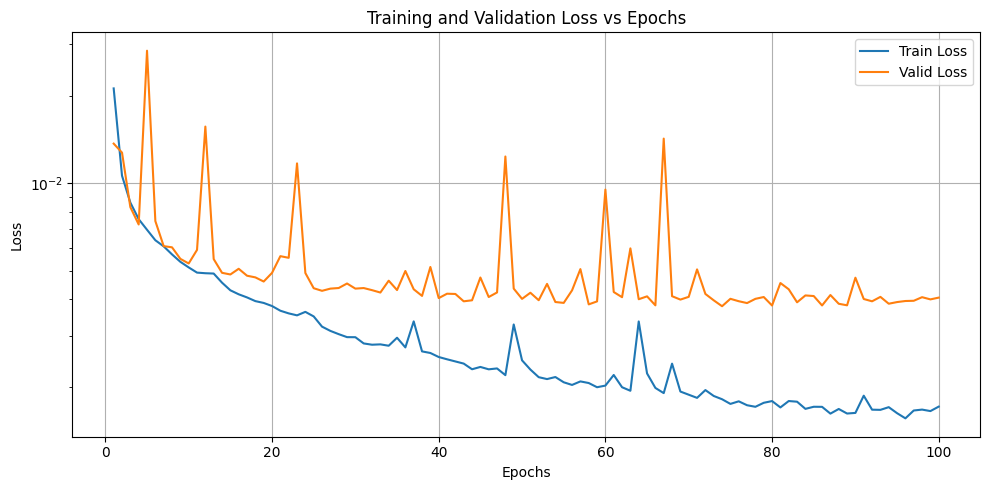

In [9]:
train_losses, valid_losses = train_temporal_spacial_model(model, 
                                                          optimizer, 
                                                          train_loader, 
                                                          valid_loader, 
                                                          n_epochs=100,
                                                          patience=30, 
                                                          criterion=criterion,
                                                          output_dir="scratch/TSED_0726_ft",
                                                          prefix="TSED_0726")
plot_losses(train_losses, valid_losses)

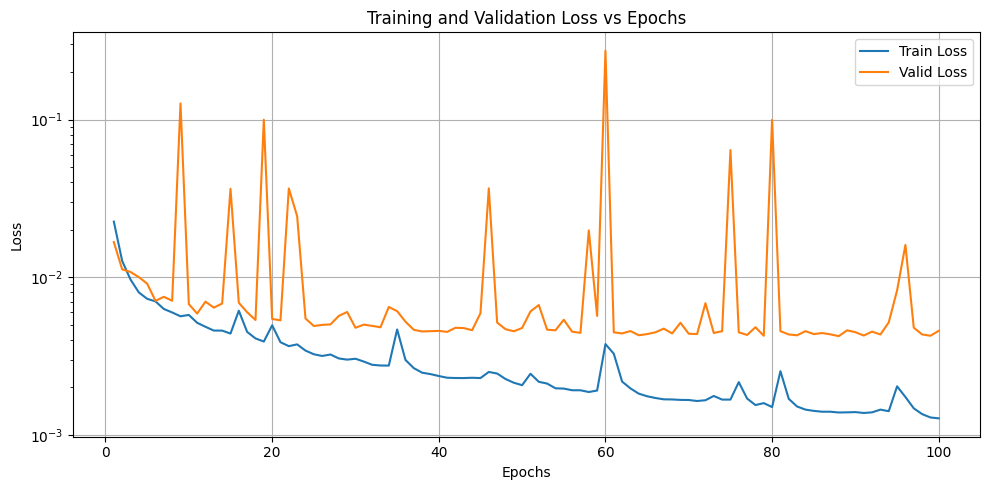

In [10]:
plot_losses(train_losses, valid_losses, img_path="scratch/TSED_0725_ft/loss.png")

In [9]:
# Print final statistics
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total Trainable Parameters: {total_params:,}")
print(f"Best Validation MSE Loss: {min(valid_losses):.5f}")

Total Trainable Parameters: 158,395,715
Best Validation MSE Loss: 0.00423
